In [172]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [207]:
ticker = "AI"
start_date = "2022-01-01"
end_date = "2024-04-30"


In [208]:
asset_data = yf.download(ticker,start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [209]:
asset_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,31.490000,32.360001,30.430000,32.299999,32.299999,2767100
2022-01-04,32.349998,32.349998,29.400000,30.820000,30.820000,5141400
2022-01-05,30.280001,31.469999,29.120001,29.330000,29.330000,3629100
2022-01-06,29.000000,30.370001,28.350000,29.610001,29.610001,2419500
2022-01-07,29.709999,30.969999,29.650000,29.940001,29.940001,2299200
...,...,...,...,...,...,...
2024-04-23,21.620001,22.629999,21.620001,22.330000,22.330000,5100900
2024-04-24,22.950001,23.110001,21.889999,22.350000,22.350000,5393400
2024-04-25,21.500000,22.190001,21.330000,22.160000,22.160000,3291800


reset_index(inplace = True) 是 pandas中将索引重置为普通列的一个方法

asset_data.reset_index(inplace = True)

asset_data
asset_data['Date'] = asset_data['Date'].map(pd.Timestamp.toordinal)

In [210]:

y = asset_data[['Adj Close']]

asset_data[['Adj Close']]:

如果你需要一个 DataFrame，例如需要继续处理数据框（如合并、连接等），或需要传递给需要数据框格式的函数时使用。
asset_data['Adj Close']:

如果你只需要一列数据，并希望对该列进行 Series 特有的操作（如单独计算某列的统计数据）时使用

In [211]:
y

,Adj Close
Date,
2022-01-03,32.299999
2022-01-04,30.820000
2022-01-05,29.330000
2022-01-06,29.610001
2022-01-07,29.940001
...,...
2024-04-23,22.330000
2024-04-24,22.350000
2024-04-25,22.160000


In [212]:
z = asset_data['Adj Close']


In [213]:
z

Date
2022-01-03    32.299999
2022-01-04    30.820000
2022-01-05    29.330000
2022-01-06    29.610001
2022-01-07    29.940001
                ...    
2024-04-23    22.330000
2024-04-24    22.350000
2024-04-25    22.160000
2024-04-26    22.830000
2024-04-29    23.100000
Name: Adj Close, Length: 583, dtype: float64

In [214]:
asset_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,31.490000,32.360001,30.430000,32.299999,32.299999,2767100
2022-01-04,32.349998,32.349998,29.400000,30.820000,30.820000,5141400
2022-01-05,30.280001,31.469999,29.120001,29.330000,29.330000,3629100
2022-01-06,29.000000,30.370001,28.350000,29.610001,29.610001,2419500
2022-01-07,29.709999,30.969999,29.650000,29.940001,29.940001,2299200
...,...,...,...,...,...,...
2024-04-23,21.620001,22.629999,21.620001,22.330000,22.330000,5100900
2024-04-24,22.950001,23.110001,21.889999,22.350000,22.350000,5393400
2024-04-25,21.500000,22.190001,21.330000,22.160000,22.160000,3291800


In [215]:
asset_data['Date'] = pd.to_datetime(asset_data.index)

In [216]:
timestamp = pd.Timestamp('2023-07-13 12:00:00')

# 将 Timestamp 对象转换为 Unix 时间戳
unix_timestamp = timestamp.timestamp()
print(f"Unix timestamp: {unix_timestamp}")

Unix timestamp: 1689249600.0


In [217]:
asset_data['Date'] = asset_data['Date'].map(pd.Timestamp.timestamp)
asset_data

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-01-03,31.490000,32.360001,30.430000,32.299999,32.299999,2767100,1.641168e+09
2022-01-04,32.349998,32.349998,29.400000,30.820000,30.820000,5141400,1.641254e+09
2022-01-05,30.280001,31.469999,29.120001,29.330000,29.330000,3629100,1.641341e+09
2022-01-06,29.000000,30.370001,28.350000,29.610001,29.610001,2419500,1.641427e+09
2022-01-07,29.709999,30.969999,29.650000,29.940001,29.940001,2299200,1.641514e+09
...,...,...,...,...,...,...,...
2024-04-23,21.620001,22.629999,21.620001,22.330000,22.330000,5100900,1.713830e+09
2024-04-24,22.950001,23.110001,21.889999,22.350000,22.350000,5393400,1.713917e+09
2024-04-25,21.500000,22.190001,21.330000,22.160000,22.160000,3291800,1.714003e+09


In [220]:
X = asset_data[['Date']]
X

,Date
Date,
2022-01-03,1.641168e+09
2022-01-04,1.641254e+09
2022-01-05,1.641341e+09
2022-01-06,1.641427e+09
2022-01-07,1.641514e+09
...,...
2024-04-23,1.713830e+09
2024-04-24,1.713917e+09
2024-04-25,1.714003e+09


In [221]:
y = asset_data['Adj Close']

In [222]:
y

Date
2022-01-03    32.299999
2022-01-04    30.820000
2022-01-05    29.330000
2022-01-06    29.610001
2022-01-07    29.940001
                ...    
2024-04-23    22.330000
2024-04-24    22.350000
2024-04-25    22.160000
2024-04-26    22.830000
2024-04-29    23.100000
Name: Adj Close, Length: 583, dtype: float64

In [223]:
y[1]

30.81999969482422

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = False)

In [225]:
model = LinearRegression()

In [226]:
model.fit(X_train, y_train)

LinearRegression()

In [227]:
X_train

,Date
Date,
2022-01-03,1.641168e+09
2022-01-04,1.641254e+09
2022-01-05,1.641341e+09
2022-01-06,1.641427e+09
2022-01-07,1.641514e+09
...,...
2023-11-02,1.698883e+09
2023-11-03,1.698970e+09
2023-11-06,1.699229e+09


In [228]:
y_train

Date
2022-01-03    32.299999
2022-01-04    30.820000
2022-01-05    29.330000
2022-01-06    29.610001
2022-01-07    29.940001
                ...    
2023-11-02    27.260000
2023-11-03    28.590000
2023-11-06    26.980000
2023-11-07    27.650000
2023-11-08    27.000000
Name: Adj Close, Length: 466, dtype: float64

In [229]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [230]:
len(y_train_pred)

466

In [231]:
len(y_test_pred)

117

In [232]:
mean_squared_error(y_train,y_train_pred)

49.98764533128225

In [233]:
X_train

,Date
Date,
2022-01-03,1.641168e+09
2022-01-04,1.641254e+09
2022-01-05,1.641341e+09
2022-01-06,1.641427e+09
2022-01-07,1.641514e+09
...,...
2023-11-02,1.698883e+09
2023-11-03,1.698970e+09
2023-11-06,1.699229e+09


In [237]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
asset_data


Train RMSE: 7.070194150890218
Test RMSE: 4.237605943011168


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-01-03,31.490000,32.360001,30.430000,32.299999,32.299999,2767100,1.641168e+09
2022-01-04,32.349998,32.349998,29.400000,30.820000,30.820000,5141400,1.641254e+09
2022-01-05,30.280001,31.469999,29.120001,29.330000,29.330000,3629100,1.641341e+09
2022-01-06,29.000000,30.370001,28.350000,29.610001,29.610001,2419500,1.641427e+09
2022-01-07,29.709999,30.969999,29.650000,29.940001,29.940001,2299200,1.641514e+09
...,...,...,...,...,...,...,...
2024-04-23,21.620001,22.629999,21.620001,22.330000,22.330000,5100900,1.713830e+09
2024-04-24,22.950001,23.110001,21.889999,22.350000,22.350000,5393400,1.713917e+09
2024-04-25,21.500000,22.190001,21.330000,22.160000,22.160000,3291800,1.714003e+09


In [235]:
last_date = asset_data['Date'].iloc[-1]
next_date = last_date + 86400  # 加一天的秒数
next_date_df = pd.DataFrame({'Date': [next_date]})
next_day_pred = model.predict(next_date_df)

print(f'Next day predicted price: {next_day_pred[0]}')


Next day predicted price: 31.355347926382706


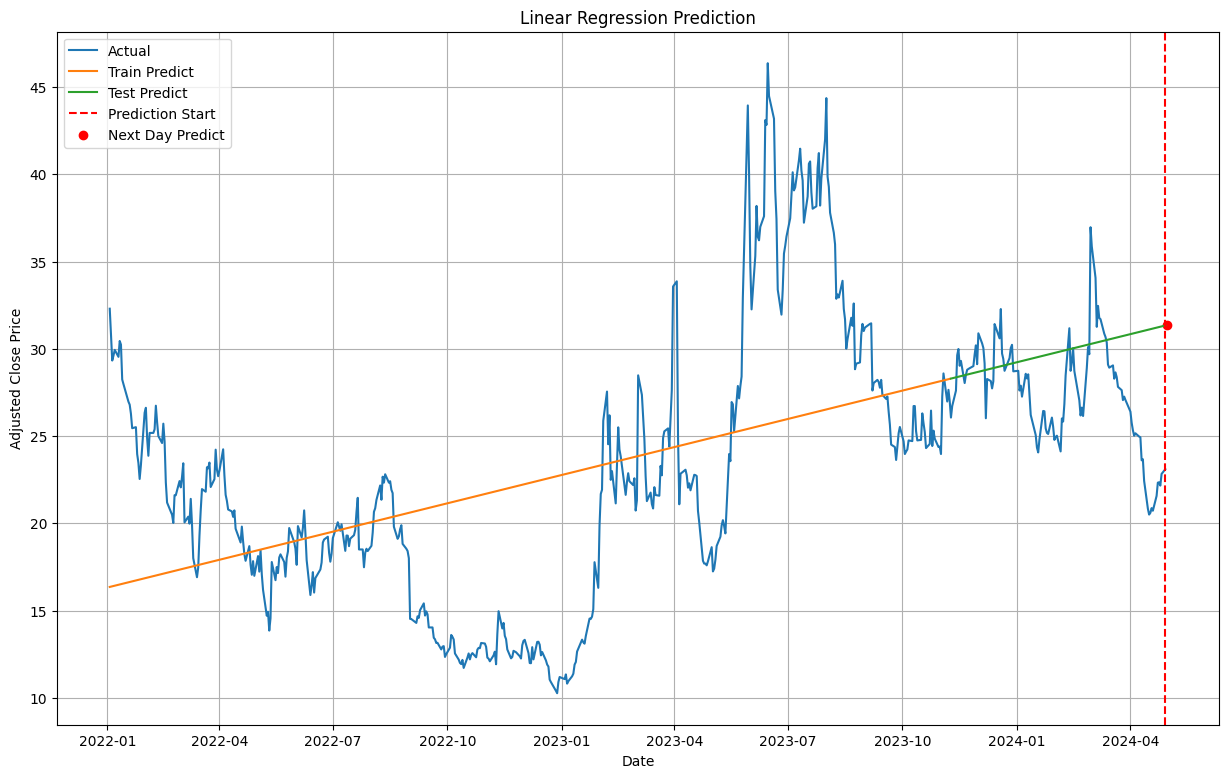

In [236]:

# 预测下一天的股价

# 可视化结果
plt.figure(figsize=(15, 9))
plt.plot(asset_data.index, asset_data['Adj Close'], label='Actual')
plt.plot(X_train.index, y_train_pred, label='Train Predict')
plt.plot(X_test.index, y_test_pred, label='Test Predict')
plt.axvline(x=asset_data.index[-1], color='red', linestyle='--', label='Prediction Start')
plt.scatter(asset_data.index[-1] + pd.Timedelta(days=1), next_day_pred, color='red', label='Next Day Predict')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Linear Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [240]:
from sklearn.preprocessing import MinMaxScaler

LTSM

In [244]:
asset_data[['Adj Close']]

,Adj Close
Date,
2022-01-03,32.299999
2022-01-04,30.820000
2022-01-05,29.330000
2022-01-06,29.610001
2022-01-07,29.940001
...,...
2024-04-23,22.330000
2024-04-24,22.350000
2024-04-25,22.160000


In [245]:
from sklearn.preprocessing import MinMaxScaler

In [246]:
adj = asset_data[['Adj Close']]

In [247]:
adj

,Adj Close
Date,
2022-01-03,32.299999
2022-01-04,30.820000
2022-01-05,29.330000
2022-01-06,29.610001
2022-01-07,29.940001
...,...
2024-04-23,22.330000
2024-04-24,22.350000
2024-04-25,22.160000


In [249]:
adj_arr = adj.values

In [250]:
split = int(0.8*len(adj_arr))

In [252]:
train,test = adj_arr[:split],adj_arr[split:]

In [253]:
train

array([[32.29999924],
       [30.81999969],
       [29.32999992],
       [29.61000061],
       [29.94000053],
       [29.54000092],
       [30.45000076],
       [30.23999977],
       [28.23999977],
       [27.97999954],
       [26.96999931],
       [26.79999924],
       [26.28000069],
       [25.45000076],
       [25.51000023],
       [23.96999931],
       [23.45999908],
       [22.54000092],
       [23.32999992],
       [26.34000015],
       [26.62000084],
       [24.87999916],
       [23.87000084],
       [25.18000031],
       [25.18000031],
       [25.38999939],
       [26.73999977],
       [25.79000092],
       [25.        ],
       [24.60000038],
       [25.70999908],
       [24.70000076],
       [22.34000015],
       [21.19000053],
       [20.48999977],
       [20.02000046],
       [21.61000061],
       [21.61000061],
       [22.42000008],
       [22.05999947],
       [22.65999985],
       [23.44000053],
       [20.04999924],
       [20.37999916],
       [19.97999954],
       [21

In [254]:
test

array([[26.05999947],
       [26.71999931],
       [27.60000038],
       [29.62999916],
       [29.98999977],
       [29.03000069],
       [29.30999947],
       [28.04000092],
       [28.51000023],
       [28.79999924],
       [28.88999939],
       [29.01000023],
       [29.67000008],
       [30.20000076],
       [29.12000084],
       [30.88999939],
       [30.30999947],
       [30.04999924],
       [29.15999985],
       [26.02000046],
       [28.27000046],
       [28.14999962],
       [27.72999954],
       [28.13999939],
       [31.42000008],
       [31.21999931],
       [30.60000038],
       [32.27999878],
       [29.72999954],
       [29.42000008],
       [28.73999977],
       [29.46999931],
       [30.04999924],
       [30.22999954],
       [28.70999908],
       [28.73999977],
       [27.61000061],
       [27.88999939],
       [27.26000023],
       [28.56999969],
       [28.29999924],
       [28.54000092],
       [27.36000061],
       [26.20999908],
       [25.05999947],
       [24

In [255]:
train.shape

(466, 1)

In [256]:
test.shape

(117, 1)

In [258]:
scaler= MinMaxScaler(feature_range=(0,1))

In [259]:
scaler

MinMaxScaler()

In [261]:
scaled_data = scaler.fit_transform(adj_arr)

In [262]:
scaled_data

array([[0.61035724],
       [0.56937137],
       [0.52810857],
       [0.53586267],
       [0.54500141],
       [0.53392416],
       [0.55912493],
       [0.55330934],
       [0.49792302],
       [0.49072279],
       [0.46275269],
       [0.45804485],
       [0.44364445],
       [0.42065913],
       [0.4223207 ],
       [0.37967321],
       [0.36554969],
       [0.34007203],
       [0.3619496 ],
       [0.44530602],
       [0.45306013],
       [0.40487398],
       [0.37690394],
       [0.41318196],
       [0.41318196],
       [0.4189975 ],
       [0.45638328],
       [0.43007481],
       [0.40819718],
       [0.39711993],
       [0.4278593 ],
       [0.39988926],
       [0.33453338],
       [0.30268626],
       [0.28330102],
       [0.27028526],
       [0.31431739],
       [0.31431739],
       [0.33674883],
       [0.32677928],
       [0.34339518],
       [0.36499587],
       [0.27111602],
       [0.28025476],
       [0.2691775 ],
       [0.30850179],
       [0.26862363],
       [0.214

Creating a data structure with 60 time-steps and 1 output,样本数、时间步数、特征数

In [414]:
X_train,y_train = [], []
for i in range(60,len(train)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

generate a list contain 406 array, each array have 60 elements

In [415]:
X_train, y_train = np.array(X_train),np.array(y_train)

In [416]:
len(X_train)

406

3个特征 样本数，时间步数，特征数

In [417]:
X_train.shape[0]

406

In [418]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [419]:
X_train.shape

(406, 60, 1)

In [420]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

设置模型：sequential：由多个线性堆叠的网络层构成，使用这个， 通过添加不同层来构建神经网络模型

In [421]:
model = Sequential()

Dense是全连接层，每一个输入节点和输出节点连接，每一个连接，有一个权重，每个输出节点有一个偏置，训练过程中，这些权重和偏置会不断调整

添加第一个 LSTM 层，包含 50 个单元（神经元），接受输入，进行加权求和，通过激活函数输出结果，输入可以是癞子原始数据或者每一层的神经元，然后在于一个权重相关联

权重是对输入的影响程度的调整参数。在训练过程中，这些权重会被不断调整，以使神经网络更好地拟合数据。偏置是一个附加参数，用于调整神经元的输出。它可以看作是输入为1的一个固定值。

激活函数对加权求和结果进行非线性变换，输出神经元的最终值。常见的激活函数有 Sigmoid、Tanh、ReLU 等。

In [422]:
model.add(LSTM(units = 50,return_sequences= True, input_shape = (X_train.shape[1],X_train.shape[2])))

D:\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [423]:
model.add(LSTM(units=50))

输出层，包含一个单元

In [424]:
model.add(Dense(units=1))

In [425]:
# 编译模型，使用均方误差损失函数和 Adam 优化器，使用 Adam 优化器，这是一种适应性学习率优化算法，能够有效加快模型训练和收敛速度
model.compile(loss='mean_squared_error', optimizer='adam')

In [426]:
model.fit(X_train,y_train,epochs=3,batch_size =1, verbose=2)

Epoch 1/3
406/406 - 9s - 22ms/step - loss: 0.0129
Epoch 2/3
406/406 - 7s - 17ms/step - loss: 0.0063
Epoch 3/3
406/406 - 7s - 17ms/step - loss: 0.0053


In [427]:
inputs = adj_arr[len(adj_arr) - len(test) - 60:]

In [428]:
len(adj_arr)

583

In [429]:
inputs.shape

(177, 1)

In [430]:
len(test)

117

In [431]:
inputs

array([[31.69000053],
       [30.01000023],
       [30.54999924],
       [31.78000069],
       [31.31999969],
       [32.59999847],
       [28.82999992],
       [29.14999962],
       [29.21999931],
       [30.78000069],
       [31.43000031],
       [31.02000046],
       [31.21999931],
       [31.43000031],
       [31.45999908],
       [27.61000061],
       [28.04000092],
       [28.21999931],
       [28.10000038],
       [27.77000046],
       [28.21999931],
       [27.36000061],
       [27.12999916],
       [27.27000046],
       [26.39999962],
       [25.64999962],
       [24.51000023],
       [24.37000084],
       [23.62999916],
       [24.42000008],
       [25.15999985],
       [25.52000046],
       [24.70000076],
       [23.96999931],
       [24.11000061],
       [24.22999954],
       [24.75      ],
       [24.70999908],
       [26.71999931],
       [26.71999931],
       [25.28000069],
       [24.75      ],
       [24.78000069],
       [26.29999924],
       [25.72999954],
       [25

In [432]:
inputs = inputs.reshape(-1,1)

In [433]:
inputs

array([[31.69000053],
       [30.01000023],
       [30.54999924],
       [31.78000069],
       [31.31999969],
       [32.59999847],
       [28.82999992],
       [29.14999962],
       [29.21999931],
       [30.78000069],
       [31.43000031],
       [31.02000046],
       [31.21999931],
       [31.43000031],
       [31.45999908],
       [27.61000061],
       [28.04000092],
       [28.21999931],
       [28.10000038],
       [27.77000046],
       [28.21999931],
       [27.36000061],
       [27.12999916],
       [27.27000046],
       [26.39999962],
       [25.64999962],
       [24.51000023],
       [24.37000084],
       [23.62999916],
       [24.42000008],
       [25.15999985],
       [25.52000046],
       [24.70000076],
       [23.96999931],
       [24.11000061],
       [24.22999954],
       [24.75      ],
       [24.70999908],
       [26.71999931],
       [26.71999931],
       [25.28000069],
       [24.75      ],
       [24.78000069],
       [26.29999924],
       [25.72999954],
       [25

In [434]:
inputs  = scaler.transform(inputs)

In [435]:
inputs

array([[0.59346444],
       [0.54693993],
       [0.5618942 ],
       [0.59595683],
       [0.58321795],
       [0.61866516],
       [0.51426199],
       [0.52312379],
       [0.5250623 ],
       [0.56826367],
       [0.58626422],
       [0.57491002],
       [0.58044862],
       [0.58626422],
       [0.58709498],
       [0.48047635],
       [0.49238442],
       [0.49736914],
       [0.49404599],
       [0.48490725],
       [0.49736914],
       [0.47355306],
       [0.46718359],
       [0.47106067],
       [0.4469676 ],
       [0.42619773],
       [0.39462754],
       [0.39075052],
       [0.37025753],
       [0.39213515],
       [0.41262809],
       [0.42259764],
       [0.39988926],
       [0.37967321],
       [0.38355029],
       [0.38687344],
       [0.40127389],
       [0.40016614],
       [0.4558294 ],
       [0.4558294 ],
       [0.41595129],
       [0.40127389],
       [0.40210471],
       [0.44419827],
       [0.42841318],
       [0.4145666 ],
       [0.38908889],
       [0.395

In [436]:
inputs.shape

(177, 1)

In [437]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [438]:
X_test

array([[0.59346444, 0.54693993, 0.5618942 , ..., 0.46302963, 0.48158405,
        0.46358351],
       [0.54693993, 0.5618942 , 0.59595683, ..., 0.48158405, 0.46358351,
        0.43755192],
       [0.5618942 , 0.59595683, 0.58321795, ..., 0.46358351, 0.43755192,
        0.4558294 ],
       ...,
       [0.42287458, 0.40210471, 0.40681255, ..., 0.31320963, 0.33425644,
        0.33481032],
       [0.40210471, 0.40681255, 0.40875106, ..., 0.33425644, 0.33481032,
        0.3295486 ],
       [0.40681255, 0.40875106, 0.38382723, ..., 0.33481032, 0.3295486 ,
        0.34810302]])

In [439]:
X_test.shape

(117, 60)

In [440]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [441]:
adj_closing_price = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


In [442]:
adj_closing_price = scaler.inverse_transform(adj_closing_price)

In [443]:
rmse = np.sqrt(np.mean(np.power((test - adj_closing_price),2)))
rmse

1.7993234945727743